In [1]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt

In [2]:
def por(gs):
    return 5.86-0.0226*gs

In [3]:
def dif(gf,ass,amm,esp):
    return 5.83 + 0.15*gf + 0.06*ass - 0.02*amm - 0.1*esp

In [4]:
def cen(gf,ass,amm,esp):
    return 5.9 + 0.12*gf + 0.055*ass - 0.02*amm - 0.065*esp

In [5]:
def att(gf,ass,amm):
    return 5.925 + 0.105*gf + 0.06*ass - 0.028*amm

# Giocatori

In [6]:
p1 = [por(35), 35, ['p']]
p2 = [por(48), 10, ['p']]

p = np.matrix([p1[:2],p2[:2]])
p_names = ['First Tier Goalie', 'Second Tier Goalie']

In [7]:
# per ora non faccio difesa, perchè non ho la variabile gol subiti che conta troppo,
# posso sempre fare centrocampo e attacco e allocare un budget per la difesa

In [8]:
brz = [cen(2,4,5,0), 20, ['m']]
genm = [cen(0,0,5,0), 2, ['m']]

m = np.matrix([brz[:2],genm[:2]])
m_names = ['Brozovic', 'General m']

In [9]:
sms = [cen(8,10,4,0), 70, ['c','t']]
bar = [cen(5,8,7,0), 40, ['c']]
zie = [cen(5,10,3,0), 35, ['c','t']]
kop = [cen(5,10,3,0), 35, ['c','t']]
pog = [cen(7,5,3,0), 55, ['c','t']]
fra = [cen(5,3,3,0), 20, ['c']]
wij = [cen(3,3,5,0), 20, ['c','t']]
rab = [cen(4,2,5,0), 20, ['c']]
ang = [cen(2,4,5,0), 20, ['m','c']]
ton = [cen(2,4,5,0), 20, ['m','c']]
lob = [cen(2,3,5,0), 20, ['m','c']]
genc1 = [cen(2,3,5,0), 5, ['c']]
genc2 = [cen(0,2,5,0), 2, ['c']]

c = np.matrix([sms[:2],bar[:2],zie[:2],kop[:2],pog[:2],fra[:2],wij[:2],rab[:2],
              ang[:2],ton[:2],lob[:2],genc1[:2],genc2[:2]])
c_names = ['SMS', 'Barella', 'Zielinski','Koop','Pogba','Frattesi','Wijnaldum',
          'Rabiot','Anguissa','Tonali','Lobotka','General c Tier 1','General c Tier 2']

In [10]:
lal = [cen(4,8,2,0), 25, ['t']]
mir = [cen(5,5,2,0), 25, ['t','a']]
# dzb = [cen(5,5,2,0), 25, ['t','w']] di base non è titolare
cal = [cen(5,8,2,0), 30, ['t']]
per = [cen(3,5,2,0), 20, ['t','w']]
pel = [cen(5,8,2,0), 35, ['t']]
luk = [cen(2,2,2,0), 8, ['t','c']]
pas = [cen(4,3,2,0), 25, ['t']]
dek = [cen(5,8,2,0), 40, ['t','a']]
gent1 = [cen(2,3,2,0), 7, ['t']]
gent2 = [cen(0,2,2,0), 2, ['t']]

t = np.matrix([lal[:2],mir[:2],cal[:2],per[:2],pel[:2],luk[:2],pas[:2],dek[:2],
              gent1[:2],gent2[:2]])
t_names = ['Luis Alberto','Miranchuk','Calhanoglu','Pereyra','Pellegrini','Lukic',
          'Pasalic','De Ketelare','General t Tier 1','General t Tier 2']

In [11]:
loo = [att(8,5,2), 60, ['a','w']]
kva = [cen(10,10,2,0), 80, ['a','w']]
zac = [cen(8,5,2,0), 60, ['a','w']]
fel = [cen(6,4,2,0), 40, ['a','w']]
ors = [cen(4,2,2,0), 10, ['a','w']]
chi = [cen(10,10,2,0), 80, ['a','w']]
genw1 = [cen(3,3,2,0), 10, ['w']]
genw2 = [cen(1,2,2,0), 3, ['w']]

w = np.matrix([loo[:2],kva[:2],zac[:2],fel[:2],ors[:2],chi[:2],genw1[:2],genw2[:2]])
w_names = ['Lookman','Kvara','Zaccagni','Felipe And','Orsolini','Chiesa',
          'General w Tier 1','General w Tier 2']

In [12]:
dyb = [att(12,10,2), 105, ['a']]
lea = [att(12,10,2), 105, ['a']]
dim = [att(6,8,2), 40, ['a']]
ber = [att(7,6,2), 60, ['a']]
gena1 = [att(3,2,2), 5, ['a']]
gena2 = [att(1,2,2), 2, ['a']]

a = np.matrix([dyb[:2],lea[:2],dim[:2],ber[:2],gena1[:2],gena2[:2]])
a_names = ['Dybala','Leao','Di Maria','Berardi','General a Tier 1','General a Tier 2']

In [13]:
osi = [att(28,3,2), 130, ['pc']]
vla = [att(28,1,2), 130, ['pc']]
imm = [att(25,1,2), 130, ['pc']]
luk = [att(25,1,2), 120, ['pc']]
lau = [att(22,3,2), 115, ['pc']]
gir = [att(12,3,2), 35, ['pc']]
bet = [att(10,0,2), 25, ['pc']]
abr = [att(18,3,2), 110, ['pc']]
san = [att(8,3,2), 18, ['pc']]
pin = [att(10,3,2), 25, ['pc']]
zap = [att(16,3,2), 80, ['pc']]
arn = [att(14,3,2), 45, ['pc']]
genpc1 = [att(4,2,2), 5, ['pc']]
genpc2 = [att(2,0,2), 2, ['pc']]

pc = np.matrix([osi[:2],vla[:2],imm[:2],luk[:2],lau[:2],gir[:2],bet[:2],abr[:2],
                san[:2],pin[:2],zap[:2],arn[:2],genpc1[:2],genpc2[:2]])
pc_names = ['Osimhen','Vlahovic','Immobile','Lukaku','Lautaro','Giroud','Beto','Abraham',
           'Sanabria','Pinamonti','Zapata','Arnautovic', 'General pc Tier 1','General pc Tier 2']

In [14]:
tot = [p_names,m_names,c_names,t_names,w_names,a_names,pc_names]
names = [item for sublist in tot for item in sublist]

In [15]:
ruoli = ['p','m','c','t','w','a','pc']

In [16]:
gioc = np.concatenate((p,m,c,t,w,a,pc))

# General Function

In [34]:
def f(formazione, crediti):
    
    x = formazione
    z = crediti
    
    # 1: Player Data
    
    # P
    
    p1 = [por(35), 35, ['p']]
    p2 = [por(48), 10, ['p']]

    p = np.matrix([p1[:2],p2[:2]])
    p_names = ['First Tier Goalie', 'Second Tier Goalie']
    
    # M
    
    brz = [cen(2,4,5,0), 20, ['m']]
    genm = [cen(0,0,5,0), 2, ['m']]

    m = np.matrix([brz[:2],genm[:2]])
    m_names = ['Brozovic', 'General m']
    
    # C
    
    sms = [cen(8,10,4,0), 70, ['c','t']]
    bar = [cen(5,8,7,0), 40, ['c']]
    zie = [cen(5,10,3,0), 35, ['c','t']]
    kop = [cen(5,10,3,0), 35, ['c','t']]
    pog = [cen(7,5,3,0), 55, ['c','t']]
    fra = [cen(5,3,3,0), 20, ['c']]
    wij = [cen(3,3,5,0), 20, ['c','t']]
    rab = [cen(4,2,5,0), 20, ['c']]
    ang = [cen(2,4,5,0), 20, ['m','c']]
    ton = [cen(2,4,5,0), 20, ['m','c']]
    lob = [cen(2,3,5,0), 20, ['m','c']]
    genc1 = [cen(2,3,5,0), 5, ['c']]
    genc2 = [cen(0,2,5,0), 2, ['c']]

    c = np.matrix([sms[:2],bar[:2],zie[:2],kop[:2],pog[:2],fra[:2],wij[:2],rab[:2],
                  ang[:2],ton[:2],lob[:2],genc1[:2],genc2[:2]])
    c_names = ['SMS', 'Barella', 'Zielinski','Koop','Pogba','Frattesi','Wijnaldum',
              'Rabiot','Anguissa','Tonali','Lobotka','General c Tier 1','General c Tier 2']
    
    # T
    
    lal = [cen(4,8,2,0), 25, ['t']]
    mir = [cen(5,5,2,0), 25, ['t','a']]
    # dzb = [cen(5,5,2,0), 25, ['t','w']] di base non è titolare
    cal = [cen(5,8,2,0), 30, ['t']]
    per = [cen(3,5,2,0), 20, ['t','w']]
    pel = [cen(5,8,2,0), 35, ['t']]
    luk = [cen(2,2,2,0), 8, ['t','c']]
    pas = [cen(4,3,2,0), 25, ['t']]
    dek = [cen(5,8,2,0), 25, ['t','a']]
    gent1 = [cen(2,3,2,0), 7, ['t']]
    gent2 = [cen(0,2,2,0), 2, ['t']]

    t = np.matrix([lal[:2],mir[:2],cal[:2],per[:2],pel[:2],luk[:2],pas[:2],dek[:2],
                  gent1[:2],gent2[:2]])
    t_names = ['Luis Alberto','Miranchuk','Calhanoglu','Pereyra','Pellegrini','Lukic',
              'Pasalic','De Ketelare','General t Tier 1','General t Tier 2']
    
    # W
    
    loo = [att(8,5,2), 60, ['a','w']]
    kva = [cen(10,10,2,0), 80, ['a','w']]
    zac = [cen(8,5,2,0), 60, ['a','w']]
    fel = [cen(6,4,2,0), 40, ['a','w']]
    ors = [cen(4,2,2,0), 10, ['a','w']]
    chi = [cen(10,10,2,0), 80, ['a','w']]
    genw1 = [cen(3,3,2,0), 10, ['w']]
    genw2 = [cen(1,2,2,0), 3, ['w']]

    w = np.matrix([loo[:2],kva[:2],zac[:2],fel[:2],ors[:2],chi[:2],genw1[:2],genw2[:2]])
    w_names = ['Lookman','Kvara','Zaccagni','Felipe And','Orsolini','Chiesa',
              'General w Tier 1','General w Tier 2']
    
    # A 
    
    dyb = [att(12,10,2), 105, ['a']]
    lea = [att(12,10,2), 105, ['a']]
    dim = [att(6,8,2), 40, ['a']]
    ber = [att(7,6,2), 60, ['a']]
    gena1 = [att(3,2,2), 5, ['a']]
    gena2 = [att(1,2,2), 2, ['a']]

    a = np.matrix([dyb[:2],lea[:2],dim[:2],ber[:2],gena1[:2],gena2[:2]])
    a_names = ['Dybala','Leao','Di Maria','Berardi','General a Tier 1','General a Tier 2']
    
    # PC
    
    osi = [att(28,3,2), 130, ['pc']]
    vla = [att(28,1,2), 130, ['pc']]
    imm = [att(25,1,2), 130, ['pc']]
    luk = [att(25,1,2), 120, ['pc']]
    lau = [att(22,3,2), 115, ['pc']]
    gir = [att(9,3,2), 35, ['pc']]
    bet = [att(8,0,2), 25, ['pc']]
    abr = [att(18,3,2), 110, ['pc']]
    san = [att(6,3,2), 18, ['pc']]
    pin = [att(6,3,2), 20, ['pc']]
    zap = [att(10,3,2), 30, ['pc']]
    arn = [att(10,3,2), 45, ['pc']]
    genpc1 = [att(4,2,2), 5, ['pc']]
    genpc2 = [att(2,0,2), 2, ['pc']]

    pc = np.matrix([osi[:2],vla[:2],imm[:2],luk[:2],lau[:2],gir[:2],bet[:2],abr[:2],
                    san[:2],pin[:2],zap[:2],arn[:2],genpc1[:2],genpc2[:2]])
    pc_names = ['Osimhen','Vlahovic','Immobile','Lukaku','Lautaro','Giroud','Beto','Abraham',
               'Sanabria','Pinamonti','Zapata','Arnautovic', 'General pc Tier 1','General pc Tier 2']
    
    # Putting it all together
    
    tot = [p_names,m_names,c_names,t_names,w_names,a_names,pc_names]
    names = [item for sublist in tot for item in sublist]
    ruoli = ['p','m','c','t','w','a','pc']
    gioc = np.concatenate((p,m,c,t,w,a,pc))
    
    
    
    # 2: Inserting the lineup:
    
    
    temp = np.eye(55)
    if x == 343:
        b_eq = np.array([6, 1, 2, 3]) #P=1 #M+C=2 #W+A+PC=3
        A_eq = np.concatenate((np.array(55*[1]).reshape(1,55),
                               np.array(2*[1]+53*[0]).reshape((1,55)), 
                               np.array(2*[0]+15*[1]+38*[0]).reshape((1,55)),
                               np.array(27*[0]+28*[1]).reshape((1,55))))


        b_ub = np.array([z]+42*[1]+[1,2,2,2,1]) #M<=1 #C<=2 #W<=2 #A<=2 #PC<=1
        A_ub = np.concatenate((gioc[:,1].transpose(),
                                temp[2,:].reshape(1,55), temp[4:15,:], temp[17:25], temp[27:33,:],
                                temp[35:39,:], temp[41:53,:],
                                np.array(2*[0]+2*[1]+51*[0]).reshape((1,55)),
                                np.array(4*[0]+13*[1]+38*[0]).reshape((1,55)),
                                np.array(27*[0]+8*[1]+20*[0]).reshape((1,55)),
                                np.array(35*[0]+6*[1]+14*[0]).reshape((1,55)),
                                np.array(41*[0]+14*[1]).reshape((1,55)),
                              ))
        
    if x == 3412:
            b_eq = np.array([6, 1, 2, 1, 2]) #P=1 #M+C=2 #T=1 #A+PC=2
            A_eq = np.concatenate((np.array(55*[1]).reshape(1,55),
                                   np.array(2*[1]+53*[0]).reshape((1,55)), 
                                   np.array(2*[0]+15*[1]+38*[0]).reshape((1,55)),
                                   np.array(17*[0]+10*[1]+28*[0]).reshape((1,55)), 
                                   np.array(35*[0]+20*[1]).reshape((1,55))))

    
            b_ub = np.array([z]+42*[1]+[1,2,2,2]) #M<=1 #C<=2 #A<=2 #PC<=2
            A_ub = np.concatenate((gioc[:,1].transpose(),
                                    temp[2,:].reshape(1,55), temp[4:15,:], temp[17:25], temp[27:33,:],
                                    temp[35:39,:], temp[41:53,:],
                                    np.array(2*[0]+2*[1]+51*[0]).reshape((1,55)),
                                    np.array(4*[0]+13*[1]+38*[0]).reshape((1,55)),
                                    np.array(35*[0]+6*[1]+14*[0]).reshape((1,55)),
                                    np.array(41*[0]+14*[1]).reshape((1,55)),
                                  ))
            
    if x == 3421:
            b_eq = np.array([7, 1, 2, 1, 3]) #P=1 #M+C=2 #W=1 #T+A+PC=3
            A_eq = np.concatenate((np.array(55*[1]).reshape(1,55),
                                   np.array(2*[1]+53*[0]).reshape((1,55)), 
                                   np.array(2*[0]+15*[1]+38*[0]).reshape((1,55)),
                                   np.array(27*[0]+8*[1]+20*[0]).reshape((1,55)),
                                   np.array(17*[0]+10*[1]+8*[0]+20*[1]).reshape((1,55))))


            b_ub = np.array([z]+42*[1]+[2,1,2,2,1]) #M<=2 #C<=1 #T<=2 #A<=2 #PC<=1
            A_ub = np.concatenate((gioc[:,1].transpose(),
                                    temp[2,:].reshape(1,55), temp[4:15,:], temp[17:25], temp[27:33,:],
                                    temp[35:39,:], temp[41:53,:],
                                    np.array(2*[0]+2*[1]+51*[0]).reshape((1,55)),
                                    np.array(4*[0]+13*[1]+38*[0]).reshape((1,55)),
                                    np.array(17*[0]+10*[1]+28*[0]).reshape((1,55)), 
                                    np.array(35*[0]+6*[1]+14*[0]).reshape((1,55)),
                                    np.array(41*[0]+14*[1]).reshape((1,55)),
                                  ))
        
    if x == 352:
            b_eq = np.array([7, 1, 3, 1, 2]) #P=1 #M+C=3 #W=1 #A+PC=2
            A_eq = np.concatenate((np.array(55*[1]).reshape(1,55),
                                   np.array(2*[1]+53*[0]).reshape((1,55)), 
                                   np.array(2*[0]+15*[1]+38*[0]).reshape((1,55)),
                                   np.array(27*[0]+8*[1]+20*[0]).reshape((1,55)),
                                   np.array(35*[0]+20*[1]).reshape((1,55))))


            b_ub = np.array([z]+42*[1]+[2,2,2,2]) #M<=2 #C<=2 #A<=2 #PC<=2
            A_ub = np.concatenate((gioc[:,1].transpose(),
                                    temp[2,:].reshape(1,55), temp[4:15,:], temp[17:25], temp[27:33,:],
                                    temp[35:39,:], temp[41:53,:],
                                    np.array(2*[0]+2*[1]+51*[0]).reshape((1,55)),
                                    np.array(4*[0]+13*[1]+38*[0]).reshape((1,55)),
                                    np.array(35*[0]+6*[1]+14*[0]).reshape((1,55)),
                                    np.array(41*[0]+14*[1]).reshape((1,55))))
                                   
        
    if x == 3511:
            b_eq = np.array([8, 1, 2, 1, 2, 2]) #P=1 #M=2 #C=1 #W=2 #T+A+PC=2
            A_eq = np.concatenate((np.array(55*[1]).reshape(1,55),
                                   np.array(2*[1]+53*[0]).reshape((1,55)), 
                                   np.array(2*[0]+2*[1]+51*[0]).reshape((1,55)),
                                   np.array(4*[0]+13*[1]+38*[0]).reshape((1,55)),
                                   np.array(27*[0]+8*[1]+20*[0]).reshape((1,55)),
                                   np.array(17*[0]+10*[1]+8*[0]+20*[1]).reshape((1,55))
                                  ))


            b_ub = np.array([z]+42*[1]+[1,2,1]) #T<=1 #A<=2 #PC<=1
            A_ub = np.concatenate((gioc[:,1].transpose(),
                                    temp[2,:].reshape(1,55), temp[4:15,:], temp[17:25], temp[27:33,:],
                                    temp[35:39,:], temp[41:53,:],
                                    np.array(17*[0]+10*[1]+28*[0]).reshape((1,55)), 
                                    np.array(35*[0]+6*[1]+14*[0]).reshape((1,55)),
                                    np.array(41*[0]+14*[1]).reshape((1,55))))
                                   
                
    if x == 433:
            b_eq = np.array([7, 1, 3, 3]) #P=1 #M+C=3 #A+W+PC=3
            A_eq = np.concatenate((np.array(55*[1]).reshape(1,55),
                                   np.array(2*[1]+53*[0]).reshape((1,55)), 
                                   np.array(2*[0]+15*[1]+38*[0]).reshape((1,55)),
                                   np.array(27*[0]+28*[1]).reshape((1,55))
                                  ))
           

            b_ub = np.array([z]+42*[1]+[2,2,2,3,1]) #M<=2 #C<=2 #W<=2 #A<=3 #PC<=1
            A_ub = np.concatenate((gioc[:,1].transpose(),
                                    temp[2,:].reshape(1,55), temp[4:15,:], temp[17:25], temp[27:33,:],
                                    temp[35:39,:], temp[41:53,:],
                                    np.array(2*[0]+2*[1]+51*[0]).reshape((1,55)),
                                    np.array(4*[0]+13*[1]+38*[0]).reshape((1,55)),
                                    np.array(27*[0]+8*[1]+20*[0]).reshape((1,55)),
                                    np.array(35*[0]+6*[1]+14*[0]).reshape((1,55)),
                                    np.array(41*[0]+14*[1]).reshape((1,55))))
                                   
                
    if x == 4312:
            b_eq = np.array([7, 1, 3, 3]) #P=1 #M+C=3 #T+A+PC=3
            A_eq = np.concatenate((np.array(55*[1]).reshape(1,55),
                                   np.array(2*[1]+53*[0]).reshape((1,55)), 
                                   np.array(2*[0]+15*[1]+38*[0]).reshape((1,55)),
                                   np.array(17*[0]+10*[1]+8*[0]+20*[1]).reshape((1,55))
                                  ))


            b_ub = np.array([z]+42*[1]+[2,2,2,2,2]) #M<=2 #C<=2 #T<=2 #A<=2 #PC<=2
            A_ub = np.concatenate((gioc[:,1].transpose(),
                                    temp[2,:].reshape(1,55), temp[4:15,:], temp[17:25], temp[27:33,:],
                                    temp[35:39,:], temp[41:53,:],
                                    np.array(2*[0]+2*[1]+51*[0]).reshape((1,55)),
                                    np.array(4*[0]+13*[1]+38*[0]).reshape((1,55)),
                                    np.array(17*[0]+10*[1]+28*[0]).reshape((1,55)), 
                                    np.array(35*[0]+6*[1]+14*[0]).reshape((1,55)),
                                    np.array(41*[0]+14*[1]).reshape((1,55))))
                                   
                
    if x == 442:
            b_eq = np.array([6, 1, 2, 1, 2]) #P=1 #M+C=2 #W=1 #A+PC=2
            A_eq = np.concatenate((np.array(55*[1]).reshape(1,55),
                                   np.array(2*[1]+53*[0]).reshape((1,55)), 
                                   np.array(2*[0]+15*[1]+38*[0]).reshape((1,55)),
                                   np.array(27*[0]+8*[1]+20*[0]).reshape((1,55)),
                                   np.array(35*[0]+20*[1]).reshape((1,55))))


            b_ub = np.array([z]+42*[1]+[1,2,2,2]) #M<=1 #C<=2 #A<=2 #PC<=2
            A_ub = np.concatenate((gioc[:,1].transpose(),
                                    temp[2,:].reshape(1,55), temp[4:15,:], temp[17:25], temp[27:33,:],
                                    temp[35:39,:], temp[41:53,:],
                                    np.array(2*[0]+2*[1]+51*[0]).reshape((1,55)),
                                    np.array(4*[0]+13*[1]+38*[0]).reshape((1,55)),
                                    np.array(35*[0]+6*[1]+14*[0]).reshape((1,55)),
                                    np.array(41*[0]+14*[1]).reshape((1,55))))
        
    if x == 4141: 
            b_eq = np.array([7, 1, 1, 2, 2, 1]) #P=1 #M=1 #C+T=2 #W=2 #A+PC=1
            A_eq = np.concatenate((np.array(55*[1]).reshape(1,55),
                                   np.array(2*[1]+53*[0]).reshape((1,55)),
                                   np.array(2*[0]+2*[1]+51*[0]).reshape((1,55)),
                                   np.array(4*[0]+23*[1]+28*[0]).reshape((1,55)),
                                   np.array(27*[0]+8*[1]+20*[0]).reshape((1,55)), 
                                   np.array(35*[0]+20*[1]).reshape((1,55))))


            b_ub = np.array([z]+42*[1]+[1,2,1,1]) #C<=1 # T<=2 #A<=1 #PC<=1
            A_ub = np.concatenate((gioc[:,1].transpose(),
                                    temp[2,:].reshape(1,55), temp[4:15,:], temp[17:25], temp[27:33,:],
                                    temp[35:39,:], temp[41:53,:],
                                    np.array(4*[0]+13*[1]+38*[0]).reshape((1,55)),
                                    np.array(17*[0]+10*[1]+28*[0]).reshape((1,55)),
                                    np.array(35*[0]+6*[1]+14*[0]).reshape((1,55)),
                                    np.array(41*[0]+14*[1]).reshape((1,55))
                                  ))
                                   
                
    if x == 4411: 
            b_eq = np.array([7, 1, 1, 1, 2, 2]) #P=1 #M=1 #C=1 #W=2 #A+PC+T=2
            A_eq = np.concatenate((np.array(55*[1]).reshape(1,55),
                                   np.array(2*[1]+53*[0]).reshape((1,55)),
                                   np.array(2*[0]+2*[1]+51*[0]).reshape((1,55)),
                                   np.array(4*[0]+13*[1]+38*[0]).reshape((1,55)),
                                   np.array(27*[0]+8*[1]+20*[0]).reshape((1,55)), 
                                   np.array(17*[0]+10*[1]+8*[0]+20*[1]).reshape((1,55))
                                  ))


            b_ub = np.array([z]+42*[1]+[1,2,1]) #T<=1 #A<=2 #PC<=1
            A_ub = np.concatenate((gioc[:,1].transpose(),
                                    temp[2,:].reshape(1,55), temp[4:15,:], temp[17:25], temp[27:33,:],
                                    temp[35:39,:], temp[41:53,:],
                                    np.array(17*[0]+10*[1]+28*[0]).reshape((1,55)),
                                    np.array(35*[0]+6*[1]+14*[0]).reshape((1,55)),
                                    np.array(41*[0]+14*[1]).reshape((1,55))
                                  ))
            
    if x == 4231:
            b_eq = np.array([7, 1, 2, 2, 2]) #P=1 #M+C=2 #W+T=2 #A+PC=2
            A_eq = np.concatenate((np.array(55*[1]).reshape(1,55),
                                   np.array(2*[1]+53*[0]).reshape((1,55)), 
                                   np.array(2*[0]+15*[1]+38*[0]).reshape((1,55)),
                                   np.array(17*[0]+10*[1]+28*[0]).reshape((1,55)), 
                                   np.array(35*[0]+20*[1]).reshape((1,55))))


            b_ub = np.array([z]+42*[1]+[2,1,2,1,2,1]) #M<=2 #C<=1 # T<=2 # W<=1 #A<=2 #PC<=1
            A_ub = np.concatenate((gioc[:,1].transpose(),
                                    temp[2,:].reshape(1,55), temp[4:15,:], temp[17:25], temp[27:33,:],
                                    temp[35:39,:], temp[41:53,:],
                                    np.array(2*[0]+2*[1]+51*[0]).reshape((1,55)),
                                    np.array(4*[0]+13*[1]+38*[0]).reshape((1,55)),
                                    np.array(17*[0]+10*[1]+28*[0]).reshape((1,55)),
                                    np.array(27*[0]+8*[1]+20*[0]).reshape((1,55)),
                                    np.array(35*[0]+6*[1]+14*[0]).reshape((1,55)),
                                    np.array(41*[0]+14*[1]).reshape((1,55)),
                                  ))
            
        
        
        
        # 3: Running the Optimization
        
    z1 = -gioc[:,0]
    z2 = np.array(z1)
    c = z2.reshape((55,))
        
    res = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, integrality=1)
        
        # 4: Showing Results
        
    final_names = []
    for i in range(len(list(res.x))):
        if 0.9 < list(res.x)[i] < 1.1:
            final_names.append(names[i])
                
        
    return [res.fun, final_names]

In [18]:
a,b = f(442,230)

In [19]:
b

['Second Tier Goalie', 'Koop', 'Frattesi', 'Orsolini', 'Osimhen', 'Pinamonti']

343
3412
3421
352
3511
433
4312
442
4141
4411
4231


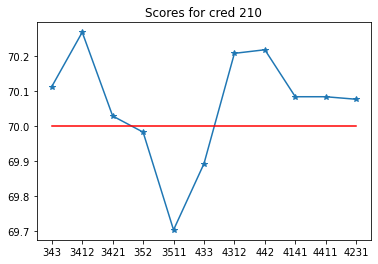

343
3412
3421
352
3511
433
4312
442
4141
4411
4231


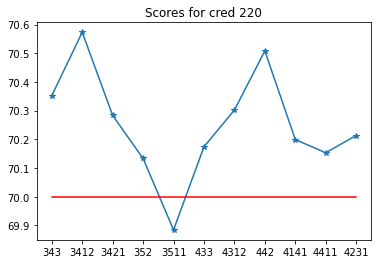

343
3412
3421
352
3511
433
4312
442
4141
4411
4231


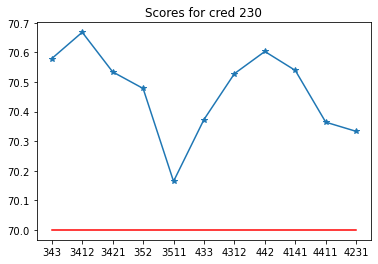

343
3412
3421
352
3511
433
4312
442
4141
4411
4231


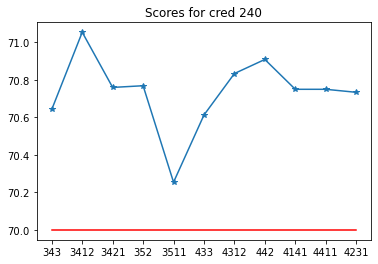

343
3412
3421
352
3511
433
4312
442
4141
4411
4231


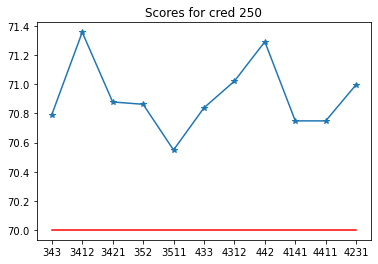

343
3412
3421
352
3511
433
4312
442
4141
4411
4231


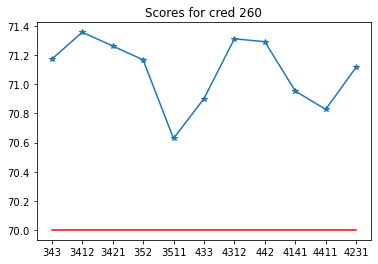

343
3412
3421
352
3511
433
4312
442
4141
4411
4231


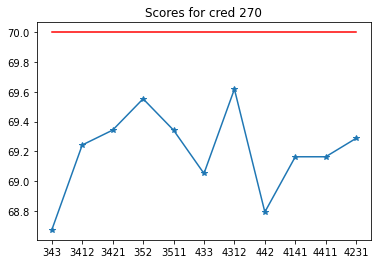

343
3412
3421
352
3511
433
4312
442
4141
4411
4231


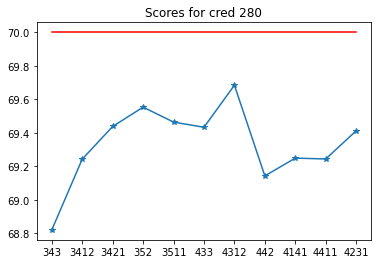

In [35]:
form = [343,3412,3421,352,3511,433,4312,442,4141,4411,4231]
other = [5,5,4,4,3,4,4,5,4,4,4]

for cred in range(210,290,10):
    score = []
    for i in range(len(form)):
        print(form[i])
        if cred <= 220:
            extra = 2*dif(3,10,4,0) + 6*(other[i]-2)
        if cred == 230:
            extra = 1*dif(3,10,4,0) + 6*(other[i]-1)
        if cred >= 270:
            extra = 5.5*other[i]
        else: 
            extra = 6*other[i]
    
        score.append(-f(form[i],cred)[0]+extra)
    
    plt.figure()
    plt.plot(score, '*-')
    plt.plot(len(form)*[70], 'r-')
    plt.xticks(range(11),form)
    plt.title(f'Scores for cred {cred}')
    plt.show()

In [21]:
# from the plots, we can see that the highest average score is achieved with 230 credits
# for the starting team and 442 formation 

In [38]:
a,b = f(3412,240)

In [39]:
b

['Second Tier Goalie',
 'Zielinski',
 'Koop',
 'De Ketelare',
 'Osimhen',
 'General pc Tier 1']

# Optimization

In [24]:
# 2+2+13+10+8+6+14

In [25]:
# positions for gen, 0 indexed: 3, 15,16, 25,26, 33,34, 39,40, 53,54

# General

In [26]:
A_eq = np.array(2*[1]+53*[0]).reshape((1,55))
b_eq = 1
temp = np.eye(55)
A_ub = np.concatenate((gioc[:,1].transpose(),
                        temp[2,:].reshape(1,55), temp[4:15,:], temp[17:25], temp[27:33,:],
                        temp[35:39,:], temp[41:53,:],
                        np.array(55*[1]).reshape(1,55),
                        temp[3,:].reshape(1,55), temp[15,:].reshape(1,55), 
                        temp[16,:].reshape(1,55), temp[25,:].reshape(1,55),
                        temp[26,:].reshape(1,55), temp[33,:].reshape(1,55), 
                        temp[34,:].reshape(1,55), temp[39,:].reshape(1,55),
                        temp[40,:].reshape(1,55), temp[53,:].reshape(1,55),
                        temp[54,:].reshape(1,55)
                      ))
                        

b_ub = np.array([250]+42*[1]+[7]+[3]*11) # 250 creds, 1 single player, 7 players total, 3 gen max per role

In [27]:
z1 = -gioc[:,0]
z2 = np.array(c)
c = z2.reshape((55,))

ValueError: cannot reshape array of size 26 into shape (55,)

In [ ]:
res = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, integrality=1)

In [ ]:
res.x

In [ ]:
res.fun - 6*4

In [ ]:
# 2+2+13+10+8+6+14

In [ ]:
l = [1,1]

In [ ]:
np.array([1,0])@np.array(['hi','ho'])

# 343

In [ ]:
b_eq = np.array([6, 1, 2, 3]) #P=1 #M+C=2 #W+A+PC=3
A_eq = np.concatenate((np.array(55*[1]).reshape(1,55),
                       np.array(2*[1]+53*[0]).reshape((1,55)), 
                       np.array(2*[0]+15*[1]+38*[0]).reshape((1,55)),
                       np.array(27*[0]+28*[1]).reshape((1,55))))
                       

b_ub = np.array([250]+42*[1]+[1,2,2,2,1]) #M<=1 #C<=2 #W<=2 #A<=2 #PC<=1
A_ub = np.concatenate((gioc[:,1].transpose(),
                        temp[2,:].reshape(1,55), temp[4:15,:], temp[17:25], temp[27:33,:],
                        temp[35:39,:], temp[41:53,:],
                        np.array(2*[0]+2*[1]+51*[0]).reshape((1,55)),
                        np.array(4*[0]+13*[1]+38*[0]).reshape((1,55)),
                        np.array(27*[0]+8*[1]+20*[0]).reshape((1,55)),
                        np.array(35*[0]+6*[1]+14*[0]).reshape((1,55)),
                        np.array(41*[0]+14*[1]).reshape((1,55)),
                      ))

In [ ]:
z1 = -gioc[:,0]
z2 = np.array(c)
c = z2.reshape((55,))

In [ ]:
res = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, integrality=1)

In [ ]:
res.fun - 5*6

In [ ]:
res.x

In [ ]:
# 2+2+13+10+8+6+14

In [ ]:
# 1-indexed: 2, 7,8, 33, 38, 53
# Por 2nd tier # C: Zie and Koop # W: Chiesa # A: Di Maria # Arnautovic

In [ ]:
res.fun-6*5

# 3412

In [ ]:
b_eq = np.array([6, 1, 2, 1, 2]) #P=1 #M+C=2 #T=1 #A+PC=2
A_eq = np.concatenate((np.array(55*[1]).reshape(1,55),
                       np.array(2*[1]+53*[0]).reshape((1,55)), 
                       np.array(2*[0]+15*[1]+38*[0]).reshape((1,55)),
                       np.array(17*[0]+10*[1]+28*[0]).reshape((1,55)), 
                       np.array(35*[0]+20*[1]).reshape((1,55))))
                       

b_ub = np.array([250]+42*[1]+[1,2,2,2]) #M<=1 #C<=2 #A<=2 #PC<=2
A_ub = np.concatenate((gioc[:,1].transpose(),
                        temp[2,:].reshape(1,55), temp[4:15,:], temp[17:25], temp[27:33,:],
                        temp[35:39,:], temp[41:53,:],
                        np.array(2*[0]+2*[1]+51*[0]).reshape((1,55)),
                        np.array(4*[0]+13*[1]+38*[0]).reshape((1,55)),
                        np.array(35*[0]+6*[1]+14*[0]).reshape((1,55)),
                        np.array(41*[0]+14*[1]).reshape((1,55)),
                      ))

In [ ]:
z1 = -gioc[:,0]
z2 = np.array(c)
c = z2.reshape((55,))

In [ ]:
res = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, integrality=1)

In [ ]:
res.fun - 5*6

In [ ]:
res.x

In [ ]:
# 2+2+13+10+8+6+14

In [ ]:
# 1-indexed: 2, 8, 10, 20, 42, 51
# Por 2nd tier # C: Fra and Koop # T: Cal # PC: Osi/Vla + Pin

# 4231

In [ ]:
b_eq = np.array([7, 1, 2, 1, 2]) #P=1 #M+C=2 #W+T=2 #A+PC=2
A_eq = np.concatenate((np.array(55*[1]).reshape(1,55),
                       np.array(2*[1]+53*[0]).reshape((1,55)), 
                       np.array(2*[0]+15*[1]+38*[0]).reshape((1,55)),
                       np.array(17*[0]+10*[1]+28*[0]).reshape((1,55)), 
                       np.array(35*[0]+20*[1]).reshape((1,55))))
                       

b_ub = np.array([250]+42*[1]+[2,1,2,1,2,1]) #M<=2 #C<=1 # T<=2 # W<=1 #A<=2 #PC<=1
A_ub = np.concatenate((gioc[:,1].transpose(),
                        temp[2,:].reshape(1,55), temp[4:15,:], temp[17:25], temp[27:33,:],
                        temp[35:39,:], temp[41:53,:],
                        np.array(2*[0]+2*[1]+51*[0]).reshape((1,55)),
                        np.array(4*[0]+13*[1]+38*[0]).reshape((1,55)),
                        np.array(17*[0]+10*[1]+28*[0]).reshape((1,55)),
                        np.array(27*[0]+8*[1]+20*[0]).reshape((1,55)),
                        np.array(35*[0]+6*[1]+14*[0]).reshape((1,55)),
                        np.array(41*[0]+14*[1]).reshape((1,55)),
                      ))

In [ ]:
z1 = -gioc[:,0]
z2 = np.array(c)
c = z2.reshape((55,))

In [ ]:
res = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, integrality=1)

In [ ]:
res.fun - 6*4

In [ ]:
res.x

In [ ]:
# 2+2+13+10+8+6+14

In [ ]:
# 1-indexed: 2, 3, 7, 20, 29, 38, 47
# Por 2nd tier # M: Brz # C: Zie # T: Cal # A: Dim # PC: Gir

# 4141

In [ ]:
b_eq = np.array([7, 1, 1, 2, 2, 1]) #P=1 #M=1 #C+T=2 #W=2 #A+PC=1
A_eq = np.concatenate((np.array(55*[1]).reshape(1,55),
                       np.array(2*[1]+53*[0]).reshape((1,55)),
                       np.array(2*[0]+2*[1]+51*[0]).reshape((1,55)),
                       np.array(4*[0]+23*[1]+28*[0]).reshape((1,55)),
                       np.array(27*[0]+8*[1]+20*[0]).reshape((1,55)), 
                       np.array(35*[0]+20*[1]).reshape((1,55))))
                       

b_ub = np.array([250]+42*[1]+[1,2,1,1]) #C<=1 # T<=2 #A<=1 #PC<=1
A_ub = np.concatenate((gioc[:,1].transpose(),
                        temp[2,:].reshape(1,55), temp[4:15,:], temp[17:25], temp[27:33,:],
                        temp[35:39,:], temp[41:53,:],
                        np.array(4*[0]+13*[1]+38*[0]).reshape((1,55)),
                        np.array(17*[0]+10*[1]+28*[0]).reshape((1,55)),
                        np.array(35*[0]+6*[1]+14*[0]).reshape((1,55)),
                        np.array(41*[0]+14*[1]).reshape((1,55)),
                      ))

In [ ]:
z1 = -gioc[:,0]
z2 = np.array(c)
c = z2.reshape((55,))

In [ ]:
res = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, integrality=1)

In [ ]:
res.fun - 6*4

In [ ]:
res.x

In [ ]:
# 2+2+13+10+8+6+14

In [ ]:
# 1-indexed: 2, 3, 7, 20, 32, 34, 42
# Por 2nd tier # M: Brz # C: Zie # T: Cal # W: Ors+genw1 # PC: Vla/Osi